In [1]:
import pandas as pd
import numpy as np
import math
import statistics

In [2]:
df = pd.read_csv("/Users/haowu/Desktop/Boston_University_Graduate_Study/github/MET-CS/CS 767/Data/Assignment_3_Hitters.csv")

In [3]:
df.dtypes

Unnamed: 0     object
AtBat           int64
Hits            int64
HmRun           int64
Runs            int64
RBI             int64
Walks           int64
Years           int64
CAtBat          int64
CHits           int64
CHmRun          int64
CRuns           int64
CRBI            int64
CWalks          int64
League         object
Division       object
PutOuts         int64
Assists         int64
Errors          int64
Salary        float64
NewLeague      object
dtype: object

In [4]:
df.isna().sum()

Unnamed: 0     0
AtBat          0
Hits           0
HmRun          0
Runs           0
RBI            0
Walks          0
Years          0
CAtBat         0
CHits          0
CHmRun         0
CRuns          0
CRBI           0
CWalks         0
League         0
Division       0
PutOuts        0
Assists        0
Errors         0
Salary        59
NewLeague      0
dtype: int64

In [5]:
temp = df['Salary'].median()
df.fillna(temp, inplace = True)
df['Salary'].isna().sum()

0

### Null value have been replaced

In [6]:
df['League'].value_counts()

A    175
N    147
Name: League, dtype: int64

In [7]:
df['Division'].value_counts()

W    165
E    157
Name: Division, dtype: int64

#### Use binary to represent league and Division

In [8]:
league_temp = [0] * len(df['League'])
division_temp = [0] * len(df['Division'])

In [9]:
for i in range(len(df['League'])):
    if df['League'][i] == 'A':
        league_temp[i] = 1
    else:
        league_temp[i] = 0

In [10]:
for i in range(len(df['Division'])):
    if df['Division'][i] == 'W':
        division_temp[i] = 1
    else:
        division_temp[i] = 0

In [11]:
df['League'] = league_temp
df['Division'] = division_temp


In [12]:
def leaky_relu(x):
    return np.maximum(0.05* x , x)

In [13]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [14]:
y = df['Salary']
x = df.drop(['Salary','Unnamed: 0','NewLeague'],axis = 1)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

#### b = (X'*X)**-1 * X'* Y formula for multiple vector

In [16]:
def linear_fit(x_train,y_train):
    x_b = np.hstack([np.ones((len(x_train),1)),x_train])
    lf_theta = np.linalg.pinv(np.dot(x_b.T,x_b)).dot(x_b.T).dot(y_train)
    lf_theta = leaky_relu(lf_theta)
    return lf_theta
    

In [17]:
def predict(a):
    x_b = np.hstack([np.ones((len(x_train),1)),x_train])
    return np.dot(x_b,reg)

In [80]:
reg = linear_fit(x_train,y_train)
y_predict = predict(x_train)


In [19]:
print("Inter:",reg[0],"\nCoef:",reg[1:],"\nR2score:",r2_score(y_train,y_predict))

Inter: 293.54243212930186 
Coef: [-1.16894186e-01  7.27012713e+00  8.38683772e+00 -4.36910867e-02
 -8.58558823e-03  5.48196907e+00 -4.30850609e-01 -5.70603957e-03
 -1.15610332e-02 -8.25540417e-02  1.71310397e+00  1.02865772e+00
 -3.54130536e-02 -2.80018545e+00 -5.00370218e+00  2.26155532e-01
  4.24724460e-01 -1.46906215e-01] 
R2score: -22.773855454774054


In [20]:
import matplotlib.pyplot as plt

In [101]:
def batch_gradient_descent(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2)/(2*len(y))
        theta = theta - lr * (np.dot((y_pred - y),x)/len(y))
        cost_history[i] = cost
    return cost_history
    

In [84]:
a =np.arange(0.1,10.1,0.1)

In [59]:
best_lr = [0]*100
for i in range(0,100):
    theta = np.ones((x_train.shape[1]))
    history = batch_gradient_descent(x_train,y_train,theta,a[i],1000)
    best_lr[i] = sum(history)/1000


In [76]:
best_lr.index(min(best_lr)) * 0.1

0.7000000000000001

#### We got the best learning rate 0.7

#### L2 with 0.01

In [105]:
def bgd_L2(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2) + (0.01* np.sum(theta.T[1:])**2)/(2*len(y))
        theta = theta - (lr/len(y)) * (np.dot((y_pred - y),x) + (0.01* np.sum(theta.T[1:])**2))
        cost_history[i] = cost
    return cost_history

Text(0.5, 1.0, 'BDG Train')

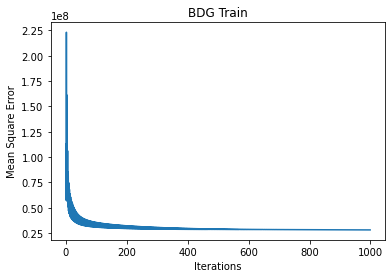

In [106]:
theta = np.ones((x_train.shape[1]))
BGD_History = bgd_L2(x_train,y_train,theta,0.7,1000)
plt.plot(BGD_History)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('BDG Train')

#### L1 with 0.01

In [103]:
def bgd_L1(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2) + abs(0.01* np.sum(theta.T[1:]))/(2*len(y))
        theta = theta - (lr/len(y)) * (np.dot((y_pred - y),x) +abs(0.01* np.sum(theta.T[1:])))
        cost_history[i] = cost
    return cost_history

Text(0.5, 1.0, 'BDG Train')

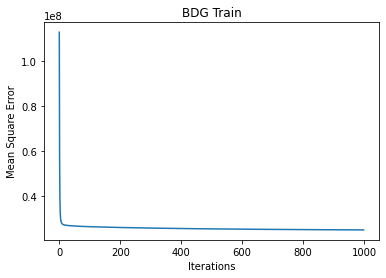

In [104]:
theta = np.ones((x_train.shape[1]))
BGD_History = bgd_L1(x_train,y_train,theta,0.7,1000)
plt.plot(BGD_History)
plt.ylabel('Mean Square Error')
plt.xlabel('Iterations')
plt.title('BDG Train')

#### Without Regularization and with L1,L2 lamba = 0.01

In [107]:
def batch_gradient_descent(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2)/(2*len(y))
        theta = theta - lr * (np.dot((y_pred - y),x)/len(y))
        cost_history[i] = cost
    return theta

def bgd_L1(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2) + abs(0.01* np.sum(theta.T[1:]))/(2*len(y))
        theta = theta - (lr/len(y)) * (np.dot((y_pred - y),x) +abs(0.01* np.sum(theta.T[1:])))
        cost_history[i] = cost
    return theta

def bgd_L2(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2) + (0.01* np.sum(theta.T[1:])**2)/(2*len(y))
        theta = theta - (lr/len(y)) * (np.dot((y_pred - y),x) + (0.01* np.sum(theta.T[1:])**2))
        cost_history[i] = cost
    return theta
    

In [135]:
theta = np.ones((x_train.shape[1]))
Weight1 = batch_gradient_descent(x_train,y_train,theta,0.7,1000)
Weight2 = bgd_L1(x_train,y_train,theta,0.7,1000)
Weight3 = bgd_L2(x_train,y_train,theta,0.7,1000)

In [141]:
def bgd_L1_2(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    cost_history = [0]*iters
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        cost =  np.sum((y_pred - y) ** 2) + abs(10* np.sum(theta.T[1:]))/(2*len(y))
        theta = theta - (lr/len(y)) * (np.dot((y_pred - y),x) +abs(10* np.sum(theta.T[1:])))
        cost_history[i] = cost
    return theta

def bgd_L2_2(x,y,theta,lr,iters):
    x_norm = (x - x.min()) / (x.max() - x.min()) ## normalization our data
    x = x_norm
    for i in range(0,iters):         
        y_pred = np.dot(x,theta.T)
        theta = theta - (lr/len(y)) * (np.dot((y_pred - y),x) + np.sum(10*theta.T[1:]))
    return theta

In [154]:
Weight4 = bgd_L1_2(x_train,y_train,theta,0.7,1000)
Weight5 = bgd_L2_2(x_train,y_train,theta,0.7,1000)

In [118]:
from pandas.core.frame import DataFrame

In [149]:
a = {
    "Original": Weight1,
    "L1_0.01": Weight2,
    "L2_0.01": Weight3,
    "L1_10": Weight4,
    "L2_10": Weight5
}


In [153]:
data = DataFrame(a)
data

,Original,L1_0.01,L2_0.01,L1_10,L2_10
0,-733.980388,-725.191020,301.038236,396.398191,396.398191
1,808.704935,803.238769,91.398590,23.594483,23.594483
2,69.666679,67.900638,-74.496083,-86.535713,-86.535713
3,258.282001,255.623235,-3.192595,-27.783034,-27.783034
4,151.526270,152.792077,244.104364,252.282261,252.282261
5,457.276294,457.697694,474.339156,475.614372,475.614372
6,-50.836904,-47.866920,228.853192,253.400325,253.400325
7,16.205405,14.089708,-232.490735,-255.029945,-255.029945
8,489.609941,482.427698,-414.414663,-497.246244,-497.246244
9,-56.017943,-65.341652,-1225.371566,-1331.723372,-1331.723372
